# Análisis Exploratorio de Datos Palmer Penguins

El dataset **Palmer Penguins** es un conjunto de datos sobre pingüinos de tres especies diferentes que anidan en una colonia del **Archipiélago Palmer**, en la Antártida. Este dataset contiene información sobre las **medidas corporales** de los pingüinos, incluyendo:

- **Longitud y profundidad del pico**.
- **Longitud de la aleta**.
- **Masa corporal**.
- Información sobre el **sexo** y la **edad** de los pingüinos.

## Especies de Pingüinos
Hay tres especies de pingüinos en el conjunto de datos:

1. **Adelie** (*Pygoscelis adeliae*).
2. **Gentoo** (*Pygoscelis papua*).
3. **Chinstrap** (*Pygoscelis antarctica*).

Cada especie se identifica en el dataset por su nombre común.

## Características Clave
- El **culmen** es el borde superior del pico de un ave.
- En este dataset, la **longitud del culmen** y la **profundidad del culmen** se renombran como las variables:
  - **`bill_length_mm`**: Longitud del pico.
  - **`bill_depth_mm`**: Profundidad del pico.

## Objetivo
El objetivo es construir un **modelo de clasificación** que utilice las características físicas del dataset para identificar con la **máxima precisión** a cuál especie pertenece cada pingüino.

## Metodología
Para alcanzar este objetivo, realizaremos los siguientes pasos:

1. **Análisis Exploratorio de Datos (EDA)**:
   - Comprender las distribuciones de las características.
   - Analizar las relaciones entre las variables.
   - Identificar correlaciones importantes para la clasificación.
   
2. **Selección de Características**:
   - Determinar las mejores características para diferenciar entre las especies.

Este notebook se centra en explorar y visualizar el conjunto de datos utilizando herramientas como:
- **Pandas**: Procesamiento y manipulación de datos.
- **Seaborn** y **Matplotlib**: Creación de gráficos para la visualización de datos.


## Importación de Bibliotecas
Para comenzar, necesitamos importar las bibliotecas esenciales que utilizaremos durante el análisis exploratorio de datos:
- **Pandas**: Para la manipulación y análisis de datos tabulares.
- **Seaborn**: Para la creación de gráficos estadísticos.
- **Matplotlib**: Para la generación de gráficos personalizados y ajustes visuales.

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Configuración de Estilo y Carga del Dataset
Antes de comenzar con el análisis, configuramos el estilo de los gráficos utilizando la función `plt.style.use`. Esto mejora la estética de las visualizaciones.
Posteriormente, cargamos el dataset de pingüinos utilizando la biblioteca Pandas. El archivo `penguins.csv` contiene los datos que analizaremos.
```python
# Configuración del estilo para gráficos
plt.style.use("seaborn-v0_8-pastel")

# Carga del dataset
df = pd.read_csv('penguins.csv')

# Mostrar el DataFrame para revisar los datos cargados
df


In [74]:
plt.style.use("seaborn-v0_8-pastel")
df = pd.read_csv('penguins.csv')
df

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...,...
339,340,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,341,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,342,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,343,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


## Limpieza de Datos: Eliminación de Columnas Irrelevantes
La limpieza de datos es un paso esencial en el análisis de datos. En este caso, eliminamos la columna `'Unnamed: 0'` del dataset. Esta columna suele generarse automáticamente al exportar un archivo CSV y típicamente contiene índices que no aportan información útil para el análisis.
Utilizamos el método `drop` de Pandas para eliminar la columna:
- **`axis=1`**: Indica que estamos eliminando una columna (y no una fila).
- **`inplace=True`**: Aplica los cambios directamente en el DataFrame original.
Después, mostramos las primeras cuatro filas del dataset para verificar el resultado.
```python
# Eliminación de la columna irrelevante 'Unnamed: 0'
df.drop('Unnamed: 0', axis=1, inplace=True)

# Visualización de las primeras cuatro filas para confirmar la limpieza
df.head(4)


In [75]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [33]:
df.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007


## Exploración y Filtrado por Especies

En este paso, exploramos las especies únicas en el dataset y filtramos los datos para cada una de ellas. Esto nos permite trabajar con subconjuntos específicos de datos según la especie de pingüino.

1. **Identificar Especies Únicas**:
   Utilizamos el método `unique` de Pandas para listar las especies disponibles en la columna `'species'`.

2. **Filtrar por Especies**:
   Creamos filtros booleanos para seleccionar únicamente las filas correspondientes a cada especie:
   - **Adelie**: Se guardan en el DataFrame `df_adelie`.
   - **Gentoo**: Se guardan en el DataFrame `df_gentoo`.
   - **Chinstrap**: Se guardan en el DataFrame `df_chinstrap`.

```python
# Identificar especies únicas
print("Especies únicas en el dataset:")
print(df['species'].unique())

# Filtrar datos para cada especie
filt = (df['species'] == 'Adelie')
df_adelie = df.loc[filt]

filt = (df['species'] == 'Gentoo')
df_gentoo = df.loc[filt]

filt = (df['species'] == 'Chinstrap')
df_chinstrap = df.loc[filt]


In [34]:
df['species'].unique()

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [35]:
filt = (df['species'] == 'Adelie')
df_adelie = df.loc[filt]
filt = (df['species'] == 'Gentoo')
df_gentoo = df.loc[filt]
filt = (df['species'] == 'Chinstrap')
df_chinstrap = df.loc[filt]

In [81]:
# Exploración Inicial del DataFrame
# En esta sección, realizamos una exploración inicial del dataset
# para entender su estructura, balance, valores faltantes y características estadísticas.

# Dimensión del DataFrame
# Conocer la forma del dataset es fundamental para entender cuántas observaciones y características contiene.
print("Dimensión del DataFrame (filas, columnas):")
df.shape  # Devuelve (número de filas, número de columnas)


Dimensión del DataFrame (filas, columnas):


(344, 8)

In [82]:
# Balance del Dataset
# Revisamos si las clases están equilibradas, verificando la cantidad de pingüinos de cada especie.
print("Balance del Dataset (Cantidad por Especie):")
df['species'].value_counts()  # Cuenta la cantidad de ocurrencias por categoría

Balance del Dataset (Cantidad por Especie):


species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [83]:
# Comprobación de valores faltantes
# El dataset no esta completo y faltan algunos datos, en su mayoría sobre el sexo de los pingüinos.
df.isnull().sum(axis=0)

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [84]:
# Estimación de la asimetría
print("Asimetría (Skewness) de las variables numéricas:")
df.drop(['species', 'island', 'sex'], axis=1).skew()

Asimetría (Skewness) de las variables numéricas:


bill_length_mm       0.053118
bill_depth_mm       -0.143465
flipper_length_mm    0.345682
body_mass_g          0.470329
year                -0.053728
dtype: float64

In [85]:
# Estimación de la curtosis
print("Curtosis de las variables numéricas:")
df.drop(['species', 'island', 'sex'], axis=1).kurt()

Curtosis de las variables numéricas:


bill_length_mm      -0.876027
bill_depth_mm       -0.906866
flipper_length_mm   -0.984273
body_mass_g         -0.719222
year                -1.504937
dtype: float64

In [86]:
# Información general del dataset
# Se tiene tres variables categoricas: species, island, y sex. Las demás características son númericas.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


## Análisis de Distribuciones: Especies, Sexo e Isla

En este análisis, exploramos cómo están distribuidas las especies de pingüinos, su sexo y su ubicación geográfica (islas) dentro del dataset. Utilizamos gráficos de pastel para representar visualmente las proporciones de estas categorías.

### Observaciones Iniciales:
- **Especies**: Los pingüinos **Adelie** son los más representados en el dataset, seguidos por **Gentoo** y **Chinstrap**.
- **Sexo**: Los datos están equilibrados en cuanto al sexo, con un 50% de pingüinos masculinos y un 50% femeninos.
- **Isla**: La mayoría de los pingüinos se encuentran en la isla **Biscoe**, mientras que una minoría se encuentra en las islas **Torgersen** y **Dream**.

### Código para Visualización
A continuación, generamos gráficos de pastel para visualizar estas distribuciones.


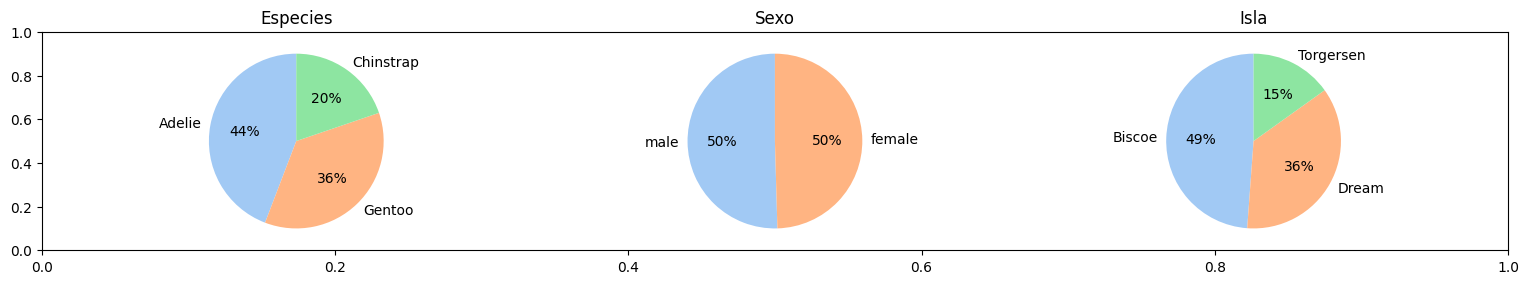

In [87]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(figsize=(15, 3))
# Distribución de Especies
ax0 = plt.subplot2grid((1, 3),(0,0))
count = df['species'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Especies')
# Distribución por Sexo
ax1 = plt.subplot2grid((1, 3), (0, 1))
count = df['sex'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Sexo')
# Distribución por Isla
ax2 = plt.subplot2grid((1, 3), (0, 2))
count = df['island'].value_counts()
labels = count.index
plt.pie(x=count, labels=labels, autopct='%.0f%%', startangle=90, colors=sns.color_palette("pastel"));
plt.title('Isla')
plt.tight_layout()

## Análisis Temporal: Frecuencia de Pingüinos por Año

En esta sección, exploramos cómo se distribuyen las observaciones de pingüinos a lo largo de los años según diferentes categorías: especie, sexo e isla. Esto nos permite observar tendencias o patrones temporales en el dataset.

### Código para Visualización


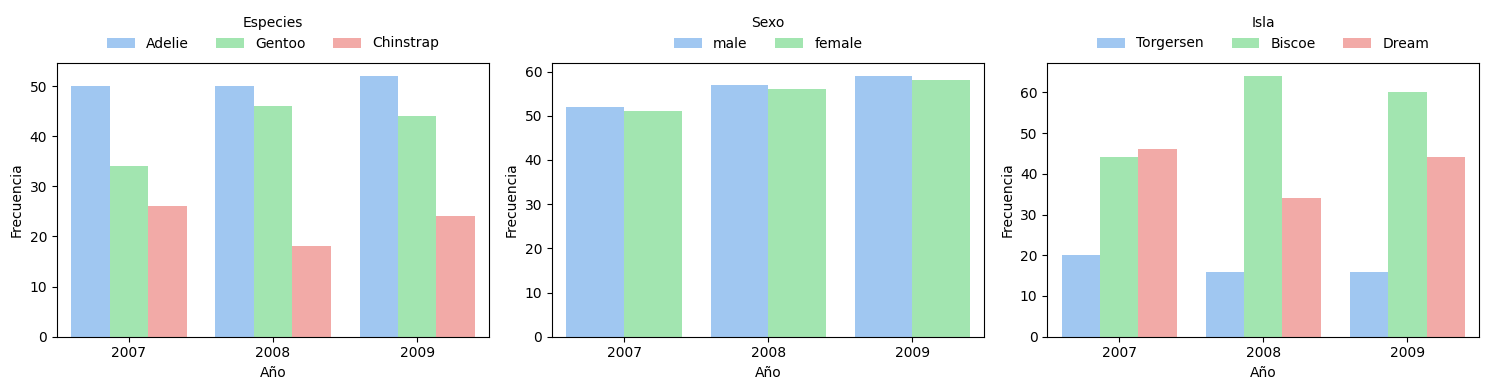

In [88]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)
# Distribución por especie a lo largo de los años
sns.countplot(data=df, x='year', hue='species', ax=ax[0])
ax[0].set_ylabel('Frecuencia')
ax[0].set_xlabel('Año')
sns.move_legend(ax[0], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Especies', frameon=False)
# Distribución por sexo a lo largo de los años
sns.countplot(data=df, x='year', hue='sex', ax=ax[1])
ax[1].set_ylabel('Frecuencia')
ax[1].set_xlabel('Año')
sns.move_legend(ax[1], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Sexo', frameon=False)
# Distribución por isla a lo largo de los años
sns.countplot(data=df, x='year', hue='island', ax=ax[2])
ax[2].set_ylabel('Frecuencia')
ax[2].set_xlabel('Año')
sns.move_legend(ax[2], "lower center", bbox_to_anchor=(.5, 1), ncol=3, title='Isla', frameon=False)
# Ajustar el diseño para evitar superposición
plt.tight_layout()

# Estadísticas Descriptivas del Dataset

In [89]:
#El método `df.describe()` de Pandas nos proporciona un resumen estadístico de las columnas numéricas en el dataset. 
# Este resumen es esencial para entender las características principales de los datos y detectar posibles problemas, como valores extremos o distribuciones inusuales.
df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,342.000000,342.000000,342.000000,342.000000,344.000000
mean,43.921930,17.151170,200.915205,4201.754386,2008.029070
std,5.459584,1.974793,14.061714,801.954536,0.818356
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.225000,15.600000,190.000000,3550.000000,2007.000000
50%,44.450000,17.300000,197.000000,4050.000000,2008.000000
75%,48.500000,18.700000,213.000000,4750.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


## Análisis Univariado: Longitud del Pico [mm]

En esta sección, realizamos un análisis univariado de la característica **"Longitud del Pico [mm]"** para entender su distribución y patrones. La longitud del pico es una característica clave en el dataset de pingüinos.

### Observaciones:
- **Mediana**: La longitud del pico tiene una mediana de aproximadamente **44 mm**.
- **Frecuencia**: Los valores más frecuentes se encuentran cerca de **40 mm** y **45 mm**, indicando una distribución multimodal.
- **Distribución**: El análisis incluye un boxplot, un histograma y una curva de densidad para visualizar mejor la variabilidad de los datos.



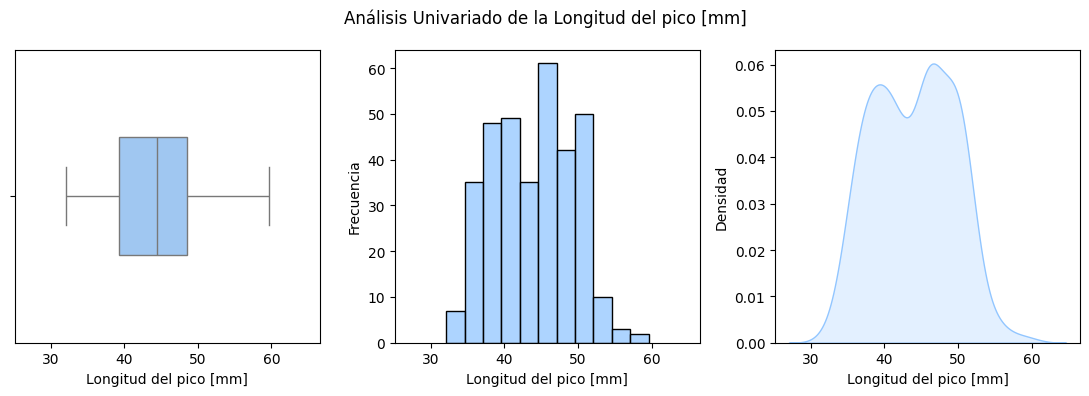

In [90]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'


# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

# Título de la figura
fig.suptitle('Análisis Univariado de la ' + var_title)

# Ajustar diseño
plt.tight_layout()

## Análisis Univariado: Profundidad del Pico [mm]

En esta sección, realizamos un análisis univariado de la característica **"Profundidad del Pico [mm]"** para comprender su distribución, concentración y asimetría.

### Observaciones:
- **Mediana**: La profundidad del pico es generalmente de **17 mm**.
- **Frecuencia**: Hay una alta frecuencia de valores entre **18 mm** y **19 mm**.
- **Distribución**: La distribución de la profundidad del pico se aproxima a una distribución normal con una ligera asimetría negativa.

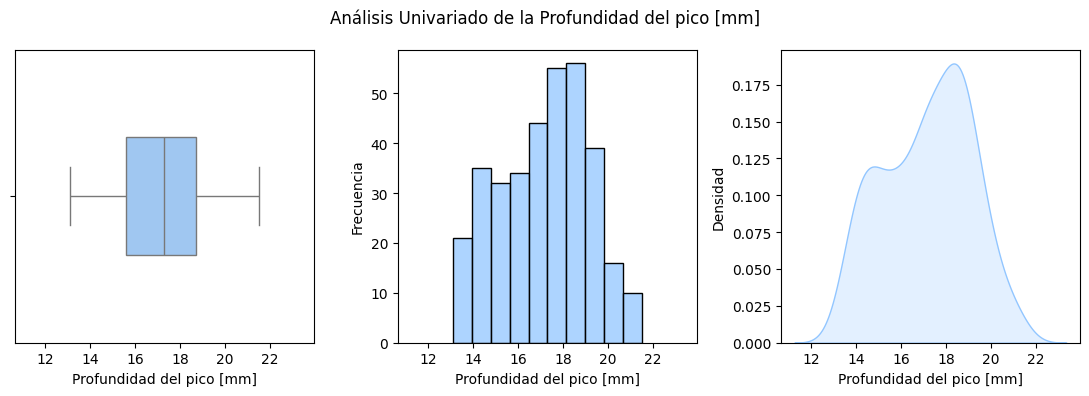

In [91]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)
# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)
# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')
# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')
# Título de la figura
fig.suptitle('Análisis Univariado de la ' + var_title)
# Ajustar diseño
plt.tight_layout()

## Análisis Univariado: Longitud de la Aleta [mm]

En esta sección, realizamos un análisis univariado de la característica **"Longitud de la Aleta [mm]"** para entender su distribución y variabilidad.

### Observaciones:
- **Mediana**: La longitud de la aleta tiene una mediana de **197 mm**.
- **Frecuencia**: Los valores más frecuentes se encuentran alrededor de **200 mm** y **210 mm**, separados por una zona de baja densidad de probabilidad, lo que genera una distribución multimodal.
- **Distribución**: Es notable la separación de los picos de frecuencia, lo que sugiere diferencias entre subgrupos en los datos.


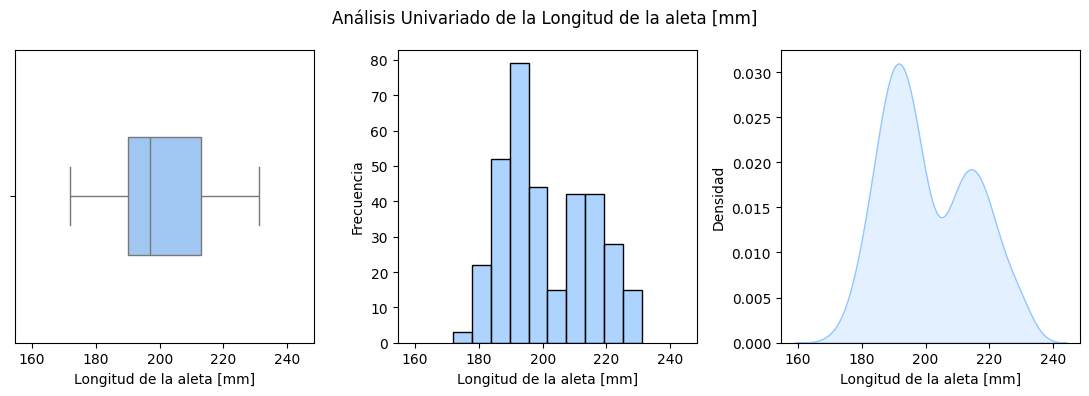

In [47]:
var = 'flipper_length_mm'
var_title = 'Longitud de la aleta [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## Análisis Univariado: Masa Corporal [g]

En esta sección, realizamos un análisis univariado de la característica **"Masa Corporal [g]"** para comprender su distribución, concentración y asimetría.

### Observaciones:
- **Media y Mediana**: La masa corporal de los pingüinos tiene una media y mediana cercanas a **4000 gramos (4 kilogramos)**.
- **Distribución**: La distribución muestra una alta frecuencia cerca de la media.
- **Asimetría**: La distribución presenta una **asimetría positiva**, con valores más concentrados en la cola de la distribución hacia valores menores.


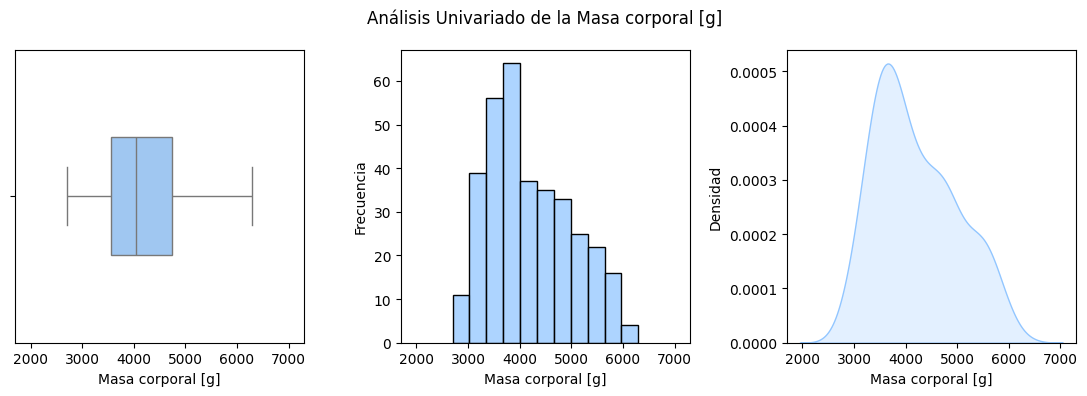

In [48]:
var = 'body_mass_g'
var_title = 'Masa corporal [g]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(11, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df[var], ax=ax[0], orient='h', width=0.4)
ax[0].set_xlabel(var_title)

# Plotea el histograma
sns.histplot(data=df[var], ax=ax[1], kde=False)
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Frecuencia')

# Plotea la curva de densidad
sns.kdeplot(data=df[var], ax=ax[2], fill=True)
ax[2].set_xlabel(var_title)
ax[2].set_ylabel('Densidad')

fig.suptitle('Análisis Univariado de la ' + var_title)

plt.tight_layout()

## Análisis Temporal: Estabilidad de las Características Físicas de los Pingüinos

En esta sección, examinamos cómo las características físicas de los pingüinos han variado (o se han mantenido estables) a lo largo de los años. Utilizamos gráficos de barras para representar los promedios de las variables físicas en función del año.

### Observaciones:
- Todas las características físicas analizadas (**longitud y profundidad del pico**, **longitud de la aleta** y **masa corporal**) se han mantenido **estables a lo largo de los años**.
- No se observan tendencias significativas de aumento o disminución en las medias de estas características físicas.

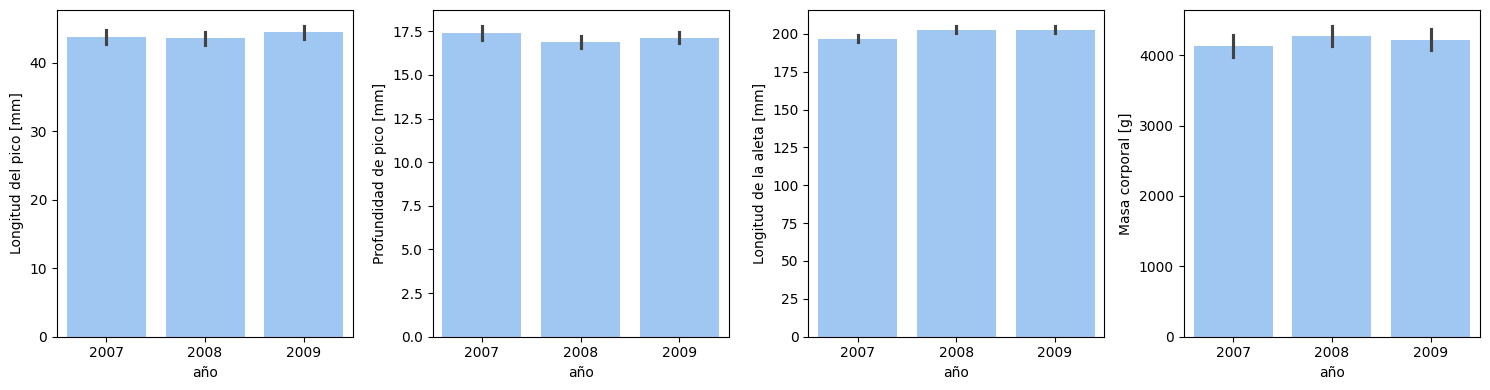

In [93]:
# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 4), sharex=True)
# Longitud del pico
sns.barplot(data=df, x='year', y='bill_length_mm', ax=ax[0])
ax[0].set_xlabel('año')
ax[0].set_ylabel('Longitud del pico [mm]')
# Profundidad del pico
sns.barplot(data=df, x='year', y='bill_depth_mm', ax=ax[1])
ax[1].set_xlabel('año')
ax[1].set_ylabel('Profundidad de pico [mm]')
# Longitud de la aleta
sns.barplot(data=df, x='year', y='flipper_length_mm', ax=ax[2])
ax[2].set_xlabel('año')
ax[2].set_ylabel('Longitud de la aleta [mm]')
# Masa corporal
sns.barplot(data=df, x='year', y='body_mass_g', ax=ax[3])
ax[3].set_xlabel('año')
ax[3].set_ylabel('Masa corporal [g]')

plt.tight_layout()

## Análisis Multivariado: Longitud del Pico [mm] vs Especies

En esta sección, exploramos cómo varía la longitud del pico entre las tres especies de pingüinos (**Adelie**, **Gentoo** y **Chinstrap**) mediante un análisis multivariado.

### Observaciones:
- **Adelie**: La longitud del pico de los pingüinos Adelie es generalmente menor que la de las otras especies.
- **Gentoo vs Chinstrap**: La diferencia en la longitud del pico entre Gentoo y Chinstrap es menos clara, ya que sus distribuciones se superponen significativamente.

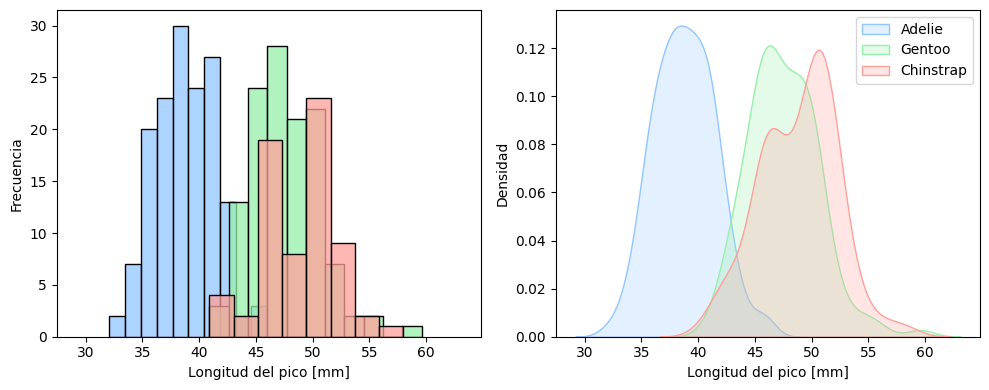

In [52]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()


## Análisis Multivariado: Longitud del Pico [mm] por Especies

En esta sección, analizamos cómo varía la longitud del pico entre las especies de pingüinos mediante visualizaciones combinadas de diagramas de caja (boxplot) y violín (violinplot). Estas herramientas permiten explorar tanto la dispersión como la distribución de los datos.


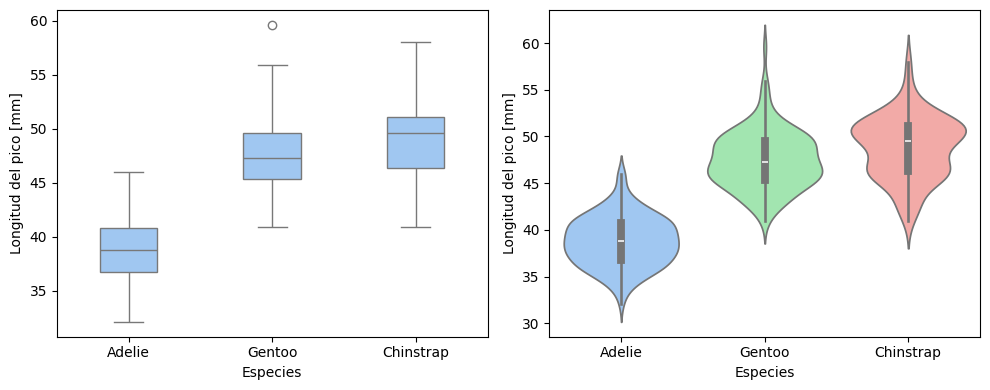

In [55]:
var = 'bill_length_mm'
var_title = 'Longitud del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Plotea el boxplot
sns.boxplot(data=df, x='species', y=var, ax=ax[0], width=.4)
ax[0].set_xlabel('Especies')
ax[0].set_ylabel(var_title)

# Plotea el diagrama de violín
sns.violinplot(data=df, x='species', y=var, ax=ax[1], hue='species')
ax[1].set_xlabel('Especies')
ax[1].set_ylabel(var_title)




plt.tight_layout()

## Análisis Multivariado: Profundidad del Pico [mm] vs Especies

En esta sección, analizamos cómo varía la **profundidad del pico** entre las especies de pingüinos mediante histogramas y curvas de densidad para visualizar las distribuciones.

### Observaciones:
- **Gentoo**: Los pingüinos Gentoo tienen una profundidad de pico significativamente menor que las otras especies.
- **Adelie y Chinstrap**: Estas especies tienen profundidades de pico muy similares, lo cual se evidencia en sus distribuciones superpuestas en casi todos los valores.

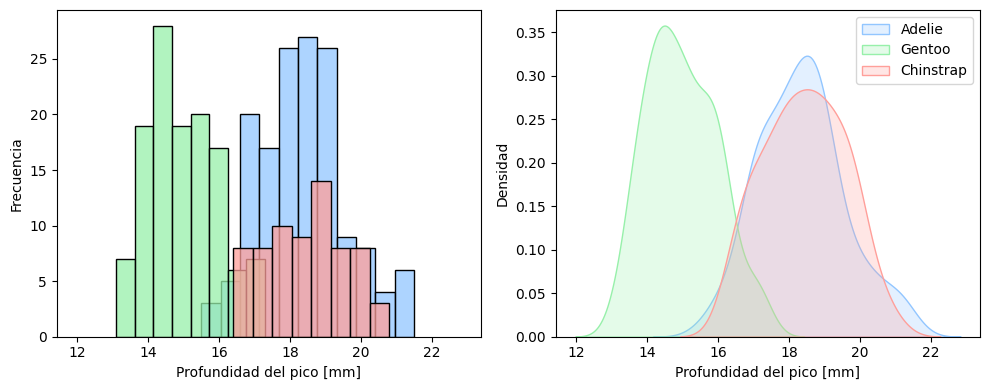

In [56]:
var = 'bill_depth_mm'
var_title = 'Profundidad del pico [mm]'

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4), sharex=True)

# Histograma para cada especie
sns.histplot(data=df_adelie, x=var, label="Adelie", kde=False, ax=ax[0])
sns.histplot(data=df_gentoo, x=var, label="Gentoo", kde=False, ax=ax[0])
sns.histplot(data=df_chinstrap, x=var, label="Chinstrap", kde=False, ax=ax[0])
ax[0].set_xlabel(var_title)
ax[0].set_ylabel('Frecuencia')

# Curva de densidad para cada especie
sns.kdeplot(data=df_adelie, x=var, label="Adelie", fill=True, ax=ax[1])
sns.kdeplot(data=df_gentoo, x=var, label="Gentoo", fill=True, ax=ax[1])
sns.kdeplot(data=df_chinstrap, x=var, label="Chinstrap", fill=True, ax=ax[1])
ax[1].set_xlabel(var_title)
ax[1].set_ylabel('Densidad')
ax[1].legend()

plt.tight_layout()

## Análisis Multivariado: Relación de Longitud del Pico con Otras Variables

Este análisis examina cómo la **longitud del pico** de los pingüinos se relaciona con otras características físicas (**profundidad del pico**, **longitud de la aleta** y **masa corporal**) para cada especie.

### Observaciones:
1. La **longitud del pico** es una característica clave para distinguir especies, ya que en combinación con otras variables, se observan patrones diferenciados:
   - **Adelie y Gentoo**: Muestran una correlación positiva entre longitud del pico, longitud de la aleta y masa corporal.
   - **Distribuciones mezcladas**: Aunque existen diferencias claras entre algunas especies, ciertas regiones de las distribuciones se superponen, lo que puede generar errores de clasificación.
2. Este análisis multivariado refuerza que combinar variables mejora la capacidad de separar especies.


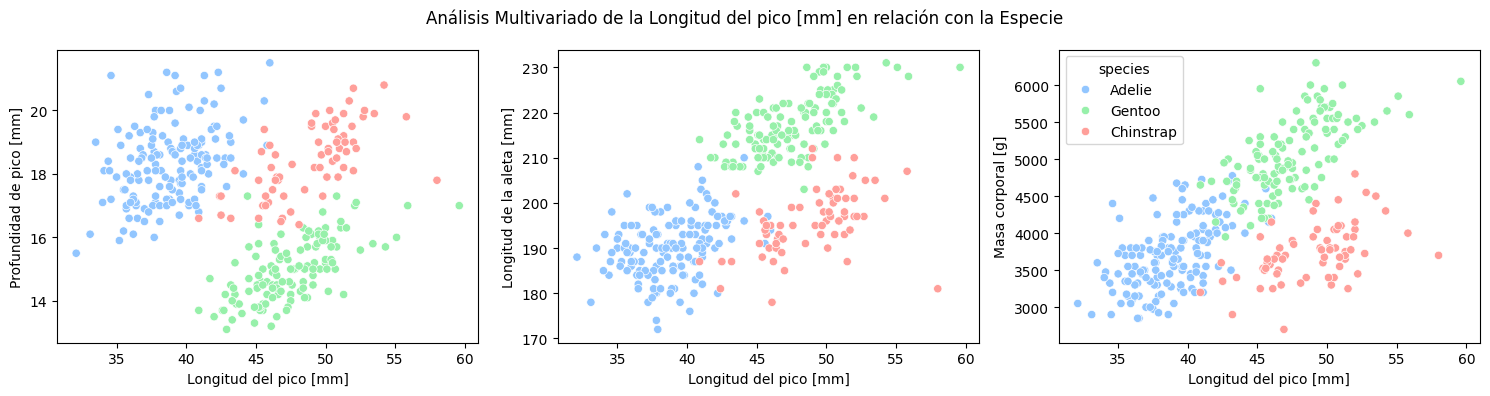

In [57]:
hue = 'species'
bl = 'bill_length_mm'; bl_ = 'Longitud del pico [mm]'
bd = 'bill_depth_mm'; bd_ = 'Profundidad de pico [mm]'
fl = 'flipper_length_mm'; fl_ = 'Longitud de la aleta [mm]'
bm = 'body_mass_g'; bm_ = 'Masa corporal [g]'

var = bl; var_ = bl_
var1 = bd; var1_ = bd_
var2 = fl; var2_ = fl_
var3 = bm; var3_ = bm_

# Ajustes de la figura de Matplotlib
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharex=True)

sns.scatterplot(data=df, x=var, y=var1, ax=ax[0], hue=hue)
ax[0].set_xlabel(var_)
ax[0].set_ylabel(var1_)
ax[0].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var2, ax=ax[1], hue=hue)
ax[1].set_xlabel(var_)
ax[1].set_ylabel(var2_)
ax[1].get_legend().remove()

sns.scatterplot(data=df, x=var, y=var3, ax=ax[2], hue=hue)
ax[2].set_xlabel(var_)
ax[2].set_ylabel(var3_)

fig.suptitle(f'Análisis Multivariado de la {var_} en relación con la Especie')

plt.tight_layout(corr = df.corr()


## Análisis de Correlaciones entre Atributos Principales

En esta sección, exploramos las correlaciones entre las características principales del dataset. Un mapa de calor (heatmap) visualiza estas correlaciones para identificar relaciones significativas entre las variables.

### Observaciones:
1. **Alta correlación positiva**:
   - **Longitud de la aleta** y **masa corporal** tienen una correlación alta de **0.87**.
2. **Correlación positiva moderada**:
   - La **longitud del pico** está positivamente correlacionada con:
     - **Longitud de la aleta** (0.66).
     - **Masa corporal** (0.6).
3. **Correlación negativa**:
   - La **profundidad del pico** tiene una correlación negativa con:
     - **Longitud de la aleta** (-0.58).
     - **Masa corporal** (-0.47).
4. **Conclusión**:
   - Se observan correlaciones significativas entre todas las características principales, lo que indica relaciones entre las dimensiones físicas de los pingüinos.
El mapa de calor confirma las correlaciones observadas:
La longitud de la aleta y la masa corporal están altamente correlacionadas.
La longitud del pico tiene correlaciones moderadas con otras variables.
La profundidad del pico muestra una correlación negativa con la longitud de la aleta y la masa corporal. Este análisis respalda la importancia de las combinaciones de variables para la clasificación de especies de pingüinos.


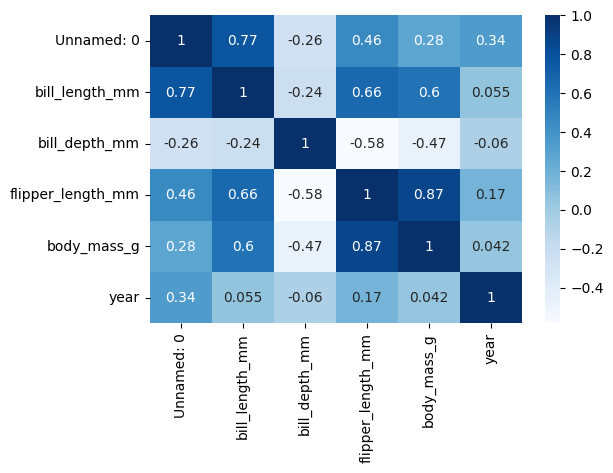

In [68]:
fig = plt.figure(figsize = (6,4))
sns.heatmap(corr, cmap='Blues', annot=True);


# Conclusión del Análisis de Datos de Palmer Penguins
El análisis exploratorio de datos del dataset Palmer Penguins me permitió extraer información clave sobre las características físicas de los pingüinos y su relación con las especies. A continuación, se detallan los principales hallazgos:
1. Balance del Dataset
El dataset no está balanceado en cuanto al número de observaciones por especie, lo que podría influir en el rendimiento de un modelo de clasificación.
Gentoo tiene una representación significativamente menor en comparación con Adelie y Chinstrap.
2. Valores Faltantes
Se identificaron valores faltantes, especialmente en la variable sexo, lo que requeriría técnicas de imputación o manejo específico para un análisis más completo.
3. Características Físicas por Especie
Gentoo es la especie más fácil de distinguir debido a:
Su profundidad de pico significativamente menor.
Su longitud de aleta y masa corporal son superiores a las de las otras especies.
Adelie tiene una longitud de pico más corta en promedio, lo que ayuda a diferenciarla de las otras especies.
Chinstrap y Adelie presentan distribuciones similares en varias características, como la profundidad del pico y la longitud de la aleta, lo que las hace más difíciles de separar.
4. Relaciones entre Variables
Todas las características físicas están correlacionadas entre sí:
Longitud de la aleta y masa corporal tienen una correlación positiva fuerte (0.87).
La longitud del pico se correlaciona moderadamente con la longitud de la aleta (0.66) y la masa corporal (0.6).
La profundidad del pico muestra correlaciones negativas con otras características físicas, como la longitud de la aleta (-0.58) y la masa corporal (-0.47).
## Logros del Análisis
Visualización Detallada:
Se generaron gráficos univariados, multivariados y mapas de calor para identificar patrones clave y relaciones entre variables.
Identificación de Características Clave:
La longitud del pico y la longitud de la aleta emergieron como variables cruciales para la clasificación de especies.
Entendimiento de Dificultades:
Se evidenció la dificultad de separar especies basándose en una sola característica, especialmente entre Adelie y Chinstrap.
Preparación para Modelos Predictivos:
La identificación de correlaciones y patrones proporciona una base sólida para diseñar un modelo de clasificación más preciso.